In [52]:
%run nb_init.py

pandas: pd 2.2.2
numpy: np 2.0.1
scipy: sp 1.14.0
statsmodels: 0.14.2
matplotlib: mpl 3.9.1
seaborn: sns 0.13.2
geopandas: gpd 1.0.1
folium: 0.17.0
requests: 2.32.3


In [13]:
"""
import chardet
with open("시도별_온실가스_중립도 (2015_2020년).csv", mode = 'rb') as f:
    d = f.readline()

print(chardet.detect(d))
"""

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}


In [40]:
df = pd.read_csv('시도별_온실가스_중립도 (2015_2020년).csv', low_memory=False)

df.head()

,시도명,년도,온실가스배출량,온실가스흡수량,온실가스중립도
0,강원도,2015,37278744,13037931,35
1,강원도,2016,38363320,13038312,34
2,강원도,2017,45091192,13035199,29
3,강원도,2018,50173656,13028515,26
4,강원도,2019,49424508,13025874,26


In [50]:
df.describe()

,년도,온실가스배출량,온실가스흡수량,온실가스중립도
count,102.000000,1.020000e+02,1.020000e+02,102.000000
mean,2017.500000,3.627670e+07,3.492469e+06,12.994809
std,1.716259,3.872792e+07,4.019123e+06,10.884849
min,2015.000000,1.443049e+06,1.897330e+05,0.699145
25%,2016.000000,4.588380e+06,3.513094e+05,4.981127
50%,2017.500000,2.189037e+07,6.422155e+05,9.699525
75%,2019.000000,5.220775e+07,5.023958e+06,20.788498
max,2020.000000,1.597312e+08,1.303831e+07,41.435878


In [46]:
sum_df = df.groupby('년도').agg({
    '온실가스배출량': 'sum',
    '온실가스흡수량': 'sum',
    '온실가스중립도': 'mean'  # 중립도는 평균을 계산하는 것이 일반적
}).reset_index()

# 결과 확인
sum_df

,년도,온실가스배출량,온실가스흡수량,온실가스중립도
0,2015,596456951,58394607,13
1,2016,604898137,65170598,14
2,2017,633564151,58396474,13
3,2018,650697304,58393032,12
4,2019,626998558,58387421,13
5,2020,587607910,57489743,14


In [44]:
sum_df.describe()

,년도,온실가스배출량,온실가스흡수량,온실가스중립도
count,6,6,6,6
mean,2018,616703835,59371979,13
std,2,24255685,2863612,1
min,2015,587607910,57489743,12
25%,2016,598567248,58388824,13
50%,2018,615948348,58393819,13
75%,2019,631922753,58396007,14
max,2020,650697304,65170598,14


In [38]:
df.sort_values(by=['년도'], inplace=True)

df['배출량_전년대비'] = df.groupby('시도명')['온실가스배출량'].pct_change() * 100
df['흡수량_전년대비'] = df.groupby('시도명')['온실가스흡수량'].pct_change() * 100
df['중립도_전년대비'] = df.groupby('시도명')['온실가스중립도'].pct_change() * 100


print(df[['시도명', '년도', '배출량_전년대비', '흡수량_전년대비', '중립도_전년대비']])

         시도명    년도  배출량_전년대비  흡수량_전년대비  중립도_전년대비
0        강원도  2015       NaN       NaN       NaN
6        경기도  2015       NaN       NaN       NaN
12      경상남도  2015       NaN       NaN       NaN
18      경상북도  2015       NaN       NaN       NaN
24     광주광역시  2015       NaN       NaN       NaN
..       ...   ...       ...       ...       ...
89   제주특별자치도  2020       -12        -2        12
83      전라북도  2020        -9        -1         9
77      전라남도  2020        -5        -2         3
71     인천광역시  2020        -7        -3         4
101     충청북도  2020        -2        -1         1

[102 rows x 5 columns]


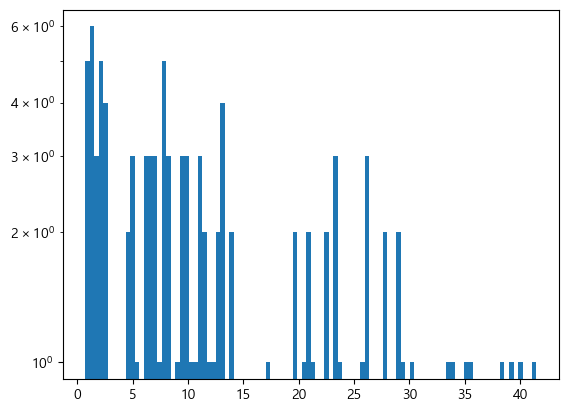

In [56]:
title_df = df['온실가스중립도'].apply(float)
plt.hist(title_df, bins = 100)
plt.yscale('log')
plt.show()

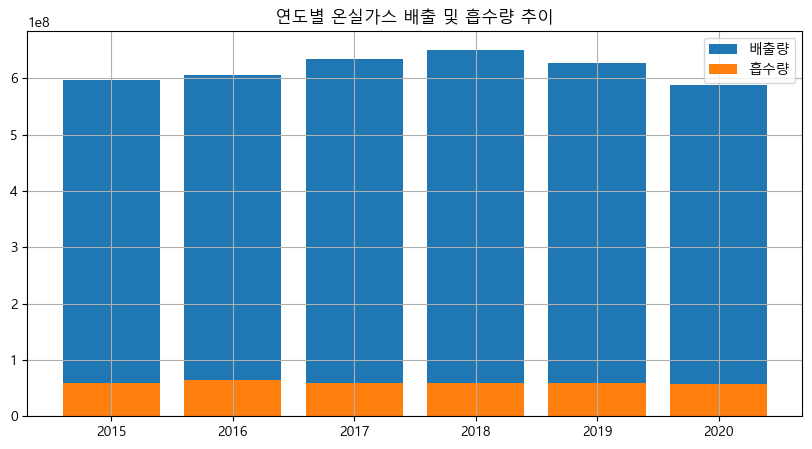

In [59]:
fig, ax = plt.subplots(figsize=(10, 5))

# 막대 그래프
ax.bar(sum_df['년도'], sum_df['온실가스배출량'], label='배출량')
ax.bar(sum_df['년도'], sum_df['온실가스흡수량'], label='흡수량')

# 라벨 및 제목 설정
ax.set_title('연도별 온실가스 배출 및 흡수량 추이')

# 범례 및 격자 추가
ax.legend()
ax.grid(True)

# 그래프 출력
plt.show()

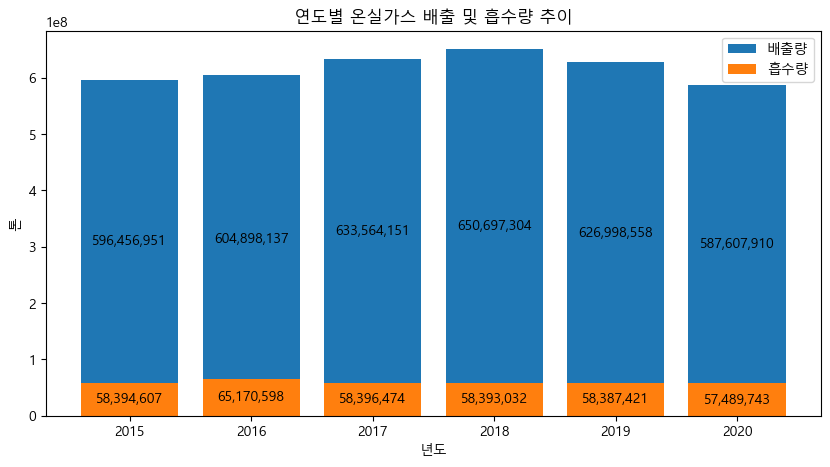

In [75]:
fig, ax = plt.subplots(figsize=(10, 5))

# 막대 그래프
bars1 = ax.bar(sum_df['년도'], sum_df['온실가스배출량'], label='배출량')
bars2 = ax.bar(sum_df['년도'], sum_df['온실가스흡수량'], label='흡수량')

# 데이터 값을 막대 중앙에 표시
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval:,.0f}', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval:,.0f}', ha='center', va='center')

# 라벨 및 제목 설정
ax.set_xlabel('년도')
ax.set_ylabel('톤')
ax.set_title('연도별 온실가스 배출 및 흡수량 추이')

# 범례 및 격자 추가
ax.legend()
# 그래프 출력
plt.show()

In [50]:
# 변화율 계산
sum_df['배출량 변화율'] = sum_df['온실가스배출량'].pct_change() * 100
sum_df['흡수량 변화율'] = sum_df['온실가스흡수량'].pct_change() * 100

print(sum_df[['년도', '배출량 변화율', '흡수량 변화율']])


     년도  배출량 변화율  흡수량 변화율
0  2015      NaN      NaN
1  2016        1       12
2  2017        5      -10
3  2018        3       -0
4  2019       -4       -0
5  2020       -6       -2
